In [1]:
'''!pip install tensorflow --upgrade
!pip install tensorflow-probability --upgrade
!pip install tf-keras --upgrade
!pip install scikit-image --upgrade
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install pandas pandas-ta numpy'''

"!pip install tensorflow --upgrade\n!pip install tensorflow-probability --upgrade\n!pip install tf-keras --upgrade\n!pip install scikit-image --upgrade\n!pip install 'imageio==2.4.0'\n!pip install pyvirtualdisplay\n!pip install tf-agents\n!pip install pyglet\n!pip install pandas pandas-ta numpy"

In [2]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from envs.rsi_env import RsiEnv
from envs.macd_env import MacdEnv
from envs.adx_env import AdxEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [14]:
df = load_dataset('./resources/AMZN.csv')
#env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = RsiEnv(df=df, window_size=10, frame_bound=(2000, 2300))
env = MacdEnv(df=df, window_size=10, frame_bound=(2000, 2500))
#env = AdxEnv(df=df, window_size=10, frame_bound=(2000, 2300))

In [15]:
df.iloc[0:5]

,Close,Volume,Open,High,Low
0,14.2410,48396380,14.3275,14.4165,14.2250
1,14.2785,49548580,14.2595,14.4780,14.1740
2,14.3545,31705200,14.2940,14.4758,14.2870
3,14.2285,36301420,14.2545,14.4250,14.1915
4,14.4865,28451720,14.2400,14.4935,14.2400


In [16]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(30,), dtype=dtype('float32'), name='observation', minimum=[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.], maximum=[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5.])})

In [17]:
env.prices[0:5]

array([184.084 , 181.56  , 178.6815, 177.4795, 178.6595], dtype=float32)

In [18]:
env.signal_features[0:5]

array([[ 1.8200309 ,  0.38256782,  1.5755248 ],
       [ 1.7126075 ,  0.24772789,  1.6029414 ],
       [ 1.531729  ,  0.08109184,  1.5886989 ],
       [ 1.3412396 , -0.05990573,  1.539207  ],
       [ 1.2105755 , -0.12484351,  1.4734807 ]], dtype=float32)

In [19]:
assert len(env.prices) == len(env.signal_features)

In [20]:
for feature in env.signal_features[0:25]:
    print(feature)

[1.8200309  0.38256782 1.5755248 ]
[1.7126075  0.24772789 1.6029414 ]
[1.531729   0.08109184 1.5886989 ]
[ 1.3412396  -0.05990573  1.539207  ]
[ 1.2105755  -0.12484351  1.4734807 ]
[ 1.1124139  -0.15079173  1.4012673 ]
[ 1.0966886  -0.10560121  1.3403516 ]
[ 1.0989074  -0.05509368  1.2920628 ]
[1.1487777  0.02343373 1.2634057 ]
[ 1.0758598  -0.01197507  1.2258965 ]
[ 1.0134203  -0.03191918  1.1834013 ]
[ 0.91292965 -0.07831559  1.129307  ]
[ 0.45274597 -0.40318707  0.9939948 ]
[ 0.09393962 -0.5819824   0.81398374]
[-0.13911255 -0.6244153   0.6233645 ]
[-0.33430707 -0.6280755   0.43183017]
[-0.452751   -0.5696032   0.25491393]
[-0.58130085 -0.53091013  0.08767097]
[-0.67801934 -0.4744905  -0.06546709]
[-0.7734895  -0.42835617 -0.20707156]
[-0.87699145 -0.39787418 -0.34105554]
[-0.9309306  -0.3338383  -0.45903054]
[-0.97404796 -0.27395222 -0.562034  ]
[-0.9882871  -0.20294069 -0.6472846 ]
[-1.0646397  -0.19582227 -0.7307556 ]


In [21]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [22]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

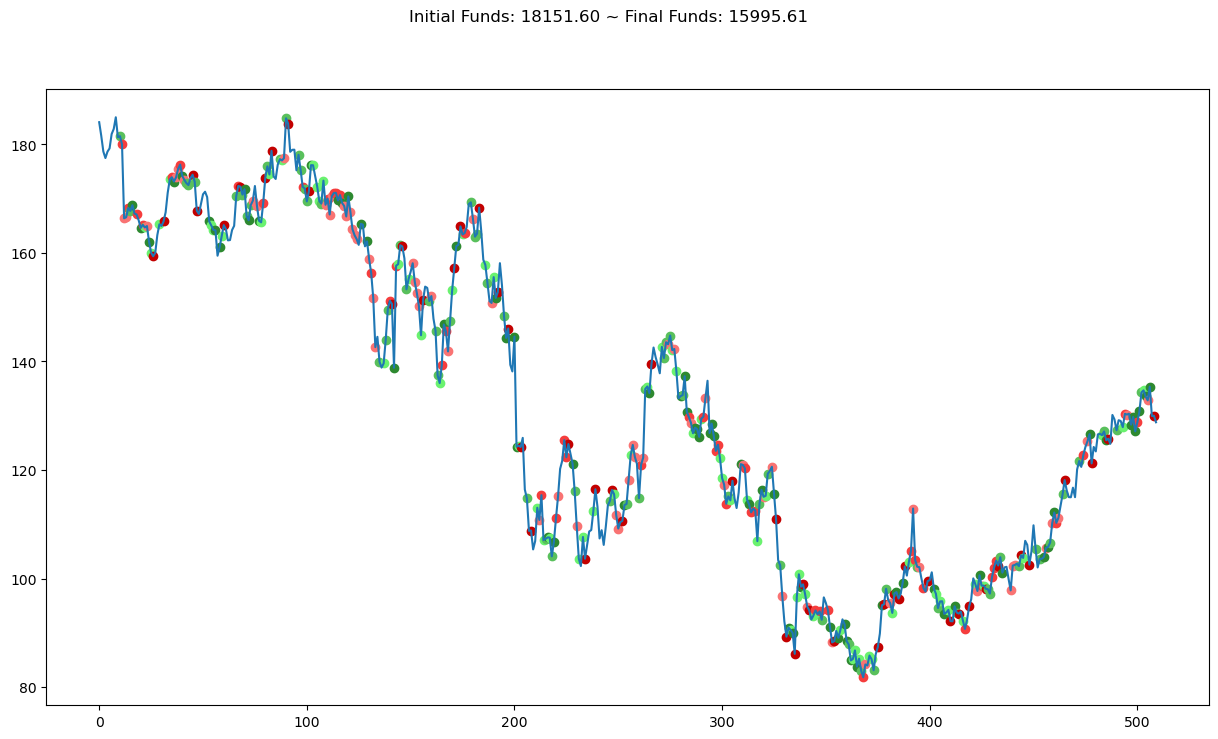

In [23]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')

In [13]:
time_step = eval_env.reset()
while not time_step.is_last():
    action_step = random_policy.action(time_step)
    time_step = eval_env.step(action_step.action)
    #print(time_step)